In [87]:
#Import librairies 

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

#Read in the data 
df = pd.read_csv(r'C:\Users\tatia\Downloads\movies.csv')

In [88]:
#Lets look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [89]:
#Let's see if there is any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [90]:
#There is missing data let's drop all the columns containing missing data
df = df.dropna()


In [91]:
#Now let's verify that there is no more missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
df.head()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [92]:
#Data types for our colums 
df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [93]:
#Change data type of columns 
df = df.astype({"budget": int,"score": int,"votes":int, "gross":int })

In [94]:
#order it by the gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [95]:
# to have a look on all the data without any dots. 
pd.set_option('display.max_rows',None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


In [110]:
#Drop any duplicates 
df.drop_duplicates().head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,3643,5,0,2015,529,7,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8,897000,105,513,1470,47,321000000,2048359754,983,149.0
7480,4388,4,2,2019,1126,6,222000,1012,1361,457,47,260000000,1670727580,1423,118.0
6653,2117,5,0,2015,1303,7,593000,335,2523,293,47,150000000,1670516444,1397,124.0
6043,3878,5,0,2012,1899,8,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0


In [97]:
#Budget high correlation 
#company high correlation
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


<function matplotlib.pyplot.show(close=None, block=None)>

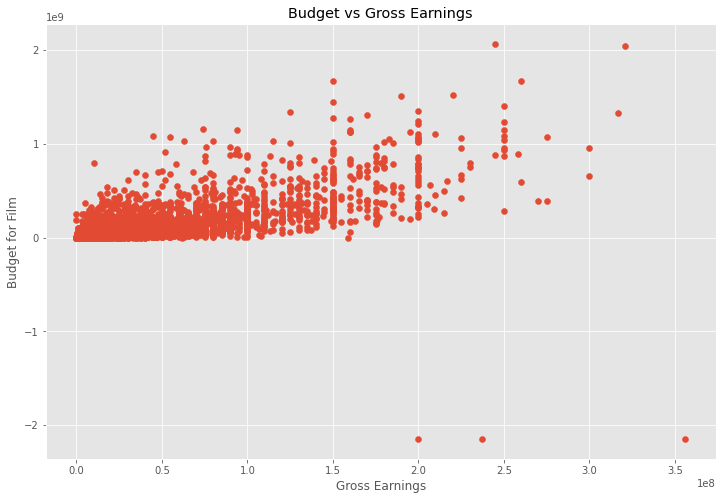

In [98]:
#Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show

In [99]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


<AxesSubplot:xlabel='budget', ylabel='gross'>

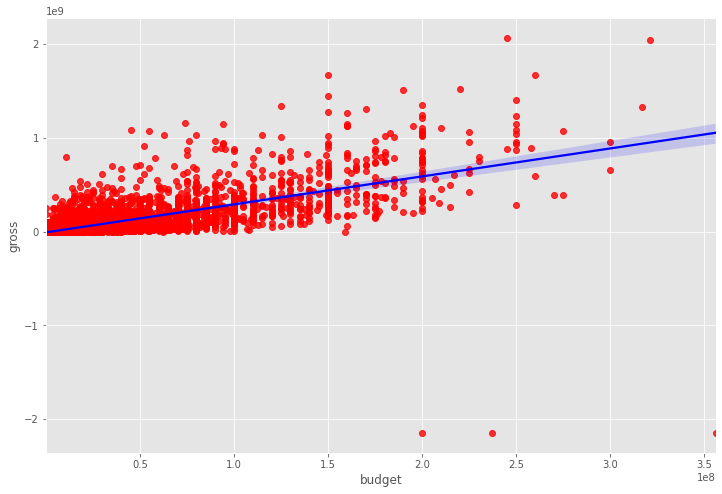

In [100]:
#Plot the Budget vs Gross using seaborn
sns.regplot(x='budget',y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
#There is a high correlation between Budget and Gross

In [101]:
#Let's start looking at correlation 
df.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.057013,0.206021,0.327722,0.267631,0.075077
score,0.057013,1.000000,0.455808,0.066443,0.194492,0.394589
votes,0.206021,0.455808,1.000000,0.439675,0.550649,0.352303
budget,0.327722,0.066443,0.439675,1.000000,0.669203,0.318695
gross,0.267631,0.194492,0.550649,0.669203,1.000000,0.223667
runtime,0.075077,0.394589,0.352303,0.318695,0.223667,1.000000


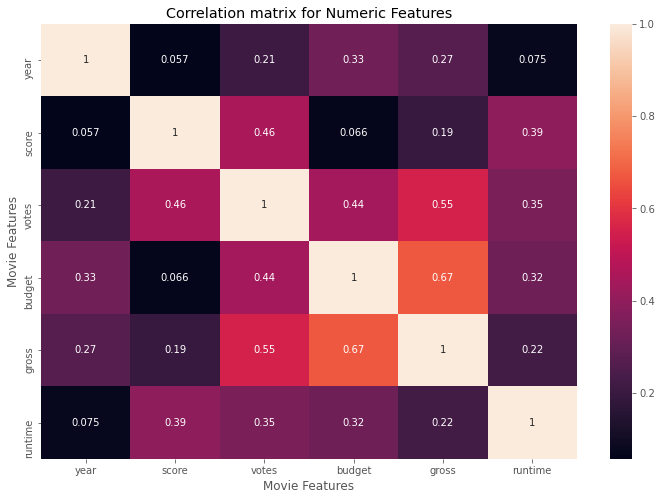

In [102]:
#Clearer look at correlation
Correlation_matrix = df.corr(method='pearson') 
sns.heatmap(Correlation_matrix, annot=True)
plt.title('Correlation matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [103]:
#Looks at Company 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


In [104]:
df_numerized = df 

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype =='object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()
            


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,3643,5,0,2015,529,7,876000,768,1806,356,47,245000000,2069521700,945,138.0
7244,389,5,0,2018,145,8,897000,105,513,1470,47,321000000,2048359754,983,149.0
7480,4388,4,2,2019,1126,6,222000,1012,1361,457,47,260000000,1670727580,1423,118.0
6653,2117,5,0,2015,1303,7,593000,335,2523,293,47,150000000,1670516444,1397,124.0
6043,3878,5,0,2012,1899,8,1300000,1060,1646,1470,47,220000000,1518815515,983,143.0


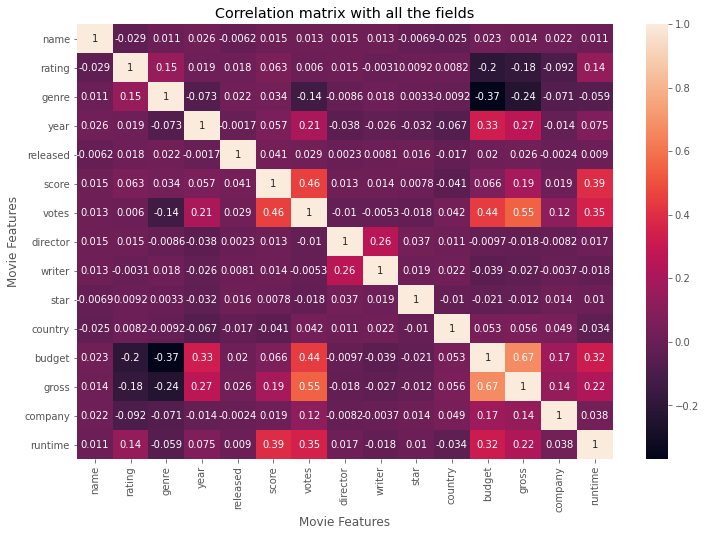

In [105]:
#Clearer look at correlation
Correlation_matrix = df_numerized.corr(method='pearson') 
sns.heatmap(Correlation_matrix, annot=True)
plt.title('Correlation matrix with all the fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [106]:

#We want to reorder our features

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.029234
          genre       0.010996
          year        0.025542
          released   -0.006152
          score       0.015473
          votes       0.012615
          director    0.015246
          writer      0.012880
          star       -0.006882
          country    -0.025490
          budget      0.023392
          gross       0.014073
          company     0.021697
          runtime     0.010850
rating    name       -0.029234
          rating      1.000000
          genre       0.147796
          year        0.019499
          released    0.018083
          score       0.063464
          votes       0.006031
          director    0.014656
          writer     -0.003149
          star        0.009196
          country     0.008230
          budget     -0.203946
          gross      -0.180805
          company    -0.092357
          runtime     0.140792
genre     name        0.010996
          rating      0.147796
        

In [107]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs 

genre     budget     -0.368523
budget    genre      -0.368523
gross     genre      -0.238629
genre     gross      -0.238629
rating    budget     -0.203946
budget    rating     -0.203946
rating    gross      -0.180805
gross     rating     -0.180805
votes     genre      -0.135990
genre     votes      -0.135990
rating    company    -0.092357
company   rating     -0.092357
genre     year       -0.073167
year      genre      -0.073167
company   genre      -0.071334
genre     company    -0.071334
year      country    -0.066748
country   year       -0.066748
runtime   genre      -0.059237
genre     runtime    -0.059237
score     country    -0.040816
country   score      -0.040816
writer    budget     -0.039466
budget    writer     -0.039466
year      director   -0.038354
director  year       -0.038354
runtime   country    -0.034477
country   runtime    -0.034477
star      year       -0.032157
year      star       -0.032157
name      rating     -0.029234
rating    name       -0.029234
writer  

In [108]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.550649
votes     gross       0.550649
gross     budget      0.669203
budget    gross       0.669203
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [109]:
#Votes and Budget have the highest correlation to gross earnings

#Company has Low correlation